<a href="https://colab.research.google.com/github/AbhishekBangde/Driver-Attrition-Prediction-Using-Ensemble-models/blob/main/OLA_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OLA - Ensemble Learning**

## **Problem Statement**

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

Provided with the monthly information for a segment of drivers for 2019 and 2020

## **Task**
To predict whether a driver will be leaving the company or not based on their attributes
like
* Demographics (city, age, gender etc.)
* Tenure information (joining date, Last Date)
* Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

## **Data Description**

- **MMMM-YY**: Reporting Date (Monthly)
- **Driver_ID**: Unique ID for drivers
- **Age**: Age of the driver
- **Gender**: Gender of the driver – Male: 0, Female: 1
- **City**: City Code of the driver
- **Education_Level**: Education level – 0 for 10+, 1 for 12+, 2 for graduate
- **Income**: Monthly average income of the driver
- **Date Of Joining**: Joining date for the driver
- **LastWorkingDate**: Last date of working for the driver
- **Joining Designation**: Designation of the driver at the time of joining
- **Grade**: Grade of the driver at the time of reporting
- **Total Business Value**: The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
- **Quarterly Rating**: Quarterly rating of the driver: 1, 2, 3, 4, 5 (higher is better)


In [ ]:
import pandas as pd     #  Importing essential Libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

### **Importing dataset**

In [ ]:
url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv'

In [ ]:
data = pd.read_csv(url)
data.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


## **Observations on Data**

In [ ]:
df = data.copy()
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
df.shape

(19104, 13)

In [ ]:
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
df.describe(include='object')

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [ ]:
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'], format='%m/%d/%y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [ ]:
df['Gender'] = df['Gender'].map({0: 'Male', 1: 'Female'})
df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,Male,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,Male,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,Male,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,Male,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,Male,C7,2,67016,2020-11-06,NaT,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.0,Male,C27,2,70254,2020-06-08,NaT,2,2,740280,3
19100,2020-09-01,2788,30.0,Male,C27,2,70254,2020-06-08,NaT,2,2,448370,3
19101,2020-10-01,2788,30.0,Male,C27,2,70254,2020-06-08,NaT,2,2,0,2
19102,2020-11-01,2788,30.0,Male,C27,2,70254,2020-06-08,NaT,2,2,200420,2


In [ ]:
# Group by Driver_ID and aggregate
agg_df = df.groupby('Driver_ID').agg({
    'Age': 'last',
    'Gender': 'last',
    'City': 'last',
    'Education_Level': 'last',
    'Income': list,
    'Dateofjoining': 'first',
    'LastWorkingDate': 'last',
    'Joining Designation': 'last',
    'Grade': 'last',
    'Total Business Value': 'sum',
    'Quarterly Rating': list
}).reset_index()
agg_df

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,28.0,Male,C23,2,"[57387, 57387, 57387]",2018-12-24,2019-03-11,1,1,1715580,"[2, 2, 2]"
1,2,31.0,Male,C7,2,"[67016, 67016]",2020-11-06,NaT,2,2,0,"[1, 1]"
2,4,43.0,Male,C13,2,"[65603, 65603, 65603, 65603, 65603]",2019-12-07,2020-04-27,2,2,350000,"[1, 1, 1, 1, 1]"
3,5,29.0,Male,C9,0,"[46368, 46368, 46368]",2019-01-09,2019-03-07,1,1,120360,"[1, 1, 1]"
4,6,31.0,Female,C11,1,"[78728, 78728, 78728, 78728, 78728]",2020-07-31,NaT,3,3,1265000,"[1, 1, 2, 2, 2]"
...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,Male,C24,0,"[82815, 82815, 82815, 82815, 82815, 82815, 828...",2015-10-15,NaT,2,3,21748820,"[3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, ..."
2377,2785,34.0,Female,C9,0,"[12105, 12105, 12105]",2020-08-28,2020-10-28,1,1,0,"[1, 1, 1]"
2378,2786,45.0,Male,C19,0,"[35370, 35370, 35370, 35370, 35370, 35370, 353...",2018-07-31,2019-09-22,2,2,2815090,"[2, 2, 2, 2, 2, 2, 1, 1, 1]"
2379,2787,28.0,Female,C20,2,"[69498, 69498, 69498, 69498, 69498, 69498]",2018-07-21,2019-06-20,1,1,977830,"[2, 2, 2, 1, 1, 1]"


## **Feature Engineering**

In [ ]:
agg_df['Target'] = agg_df['LastWorkingDate'].apply(lambda x: 0 if pd.isna(x) else 1)
agg_df

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Target
0,1,28.0,Male,C23,2,"[57387, 57387, 57387]",2018-12-24,2019-03-11,1,1,1715580,"[2, 2, 2]",1
1,2,31.0,Male,C7,2,"[67016, 67016]",2020-11-06,NaT,2,2,0,"[1, 1]",0
2,4,43.0,Male,C13,2,"[65603, 65603, 65603, 65603, 65603]",2019-12-07,2020-04-27,2,2,350000,"[1, 1, 1, 1, 1]",1
3,5,29.0,Male,C9,0,"[46368, 46368, 46368]",2019-01-09,2019-03-07,1,1,120360,"[1, 1, 1]",1
4,6,31.0,Female,C11,1,"[78728, 78728, 78728, 78728, 78728]",2020-07-31,NaT,3,3,1265000,"[1, 1, 2, 2, 2]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,Male,C24,0,"[82815, 82815, 82815, 82815, 82815, 82815, 828...",2015-10-15,NaT,2,3,21748820,"[3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, ...",0
2377,2785,34.0,Female,C9,0,"[12105, 12105, 12105]",2020-08-28,2020-10-28,1,1,0,"[1, 1, 1]",1
2378,2786,45.0,Male,C19,0,"[35370, 35370, 35370, 35370, 35370, 35370, 353...",2018-07-31,2019-09-22,2,2,2815090,"[2, 2, 2, 2, 2, 2, 1, 1, 1]",1
2379,2787,28.0,Female,C20,2,"[69498, 69498, 69498, 69498, 69498, 69498]",2018-07-21,2019-06-20,1,1,977830,"[2, 2, 2, 1, 1, 1]",1


In [ ]:
agg_df['rating_increased'] = agg_df['Quarterly Rating'].apply(lambda x: 1 if np.diff(x).sum() > 0 else 0)
agg_df['income_increased'] = agg_df['Income'].apply(lambda x: 1 if np.diff(x).sum() > 0 else 0)

agg_df['avg_income'] = agg_df['Income'].apply(np.mean)
agg_df['avg_rating'] = agg_df['Quarterly Rating'].apply(np.mean)

agg_df.drop(['Income', 'Quarterly Rating'], axis=1, inplace=True)
agg_df.head()

,Driver_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Target,rating_increased,income_increased,avg_income,avg_rating
0,1,28.0,Male,C23,2,2018-12-24,2019-03-11,1,1,1715580,1,0,0,57387.0,2.0
1,2,31.0,Male,C7,2,2020-11-06,NaT,2,2,0,0,0,0,67016.0,1.0
2,4,43.0,Male,C13,2,2019-12-07,2020-04-27,2,2,350000,1,0,0,65603.0,1.0
3,5,29.0,Male,C9,0,2019-01-09,2019-03-07,1,1,120360,1,0,0,46368.0,1.0
4,6,31.0,Female,C11,1,2020-07-31,NaT,3,3,1265000,0,1,0,78728.0,1.6


In [ ]:
agg_df['Year_of_joining'] = agg_df['Dateofjoining'].dt.year
agg_df['Month_of_joining'] = agg_df['Dateofjoining'].dt.month
agg_df['Day_of_joining'] = agg_df['Dateofjoining'].dt.day

agg_df.drop(['Dateofjoining', 'LastWorkingDate'], axis=1, inplace=True)
agg_df.head()

,Driver_ID,Age,Gender,City,Education_Level,Joining Designation,Grade,Total Business Value,Target,rating_increased,income_increased,avg_income,avg_rating,Year_of_joining,Month_of_joining,Day_of_joining
0,1,28.0,Male,C23,2,1,1,1715580,1,0,0,57387.0,2.0,2018,12,24
1,2,31.0,Male,C7,2,2,2,0,0,0,0,67016.0,1.0,2020,11,6
2,4,43.0,Male,C13,2,2,2,350000,1,0,0,65603.0,1.0,2019,12,7
3,5,29.0,Male,C9,0,1,1,120360,1,0,0,46368.0,1.0,2019,1,9
4,6,31.0,Female,C11,1,3,3,1265000,0,1,0,78728.0,1.6,2020,7,31


In [ ]:
agg_df['Year_of_joining'].value_counts()

,count
Year_of_joining,
2020,818
2018,599
2019,591
2015,109
2016,108
2017,86
2013,41
2014,29


## **Missing Value Detection and Treatment**

In [ ]:
agg_df.isnull().sum()

,0
Driver_ID,0
Age,0
Gender,0
City,0
Education_Level,0
Joining Designation,0
Grade,0
Total Business Value,0
Target,0
rating_increased,0


**Since there are no missing values in features, as features have been aggregated therefore the aggregation filled up the values missing in each or the other samples.**

## **Outlier Detection and Treatment**

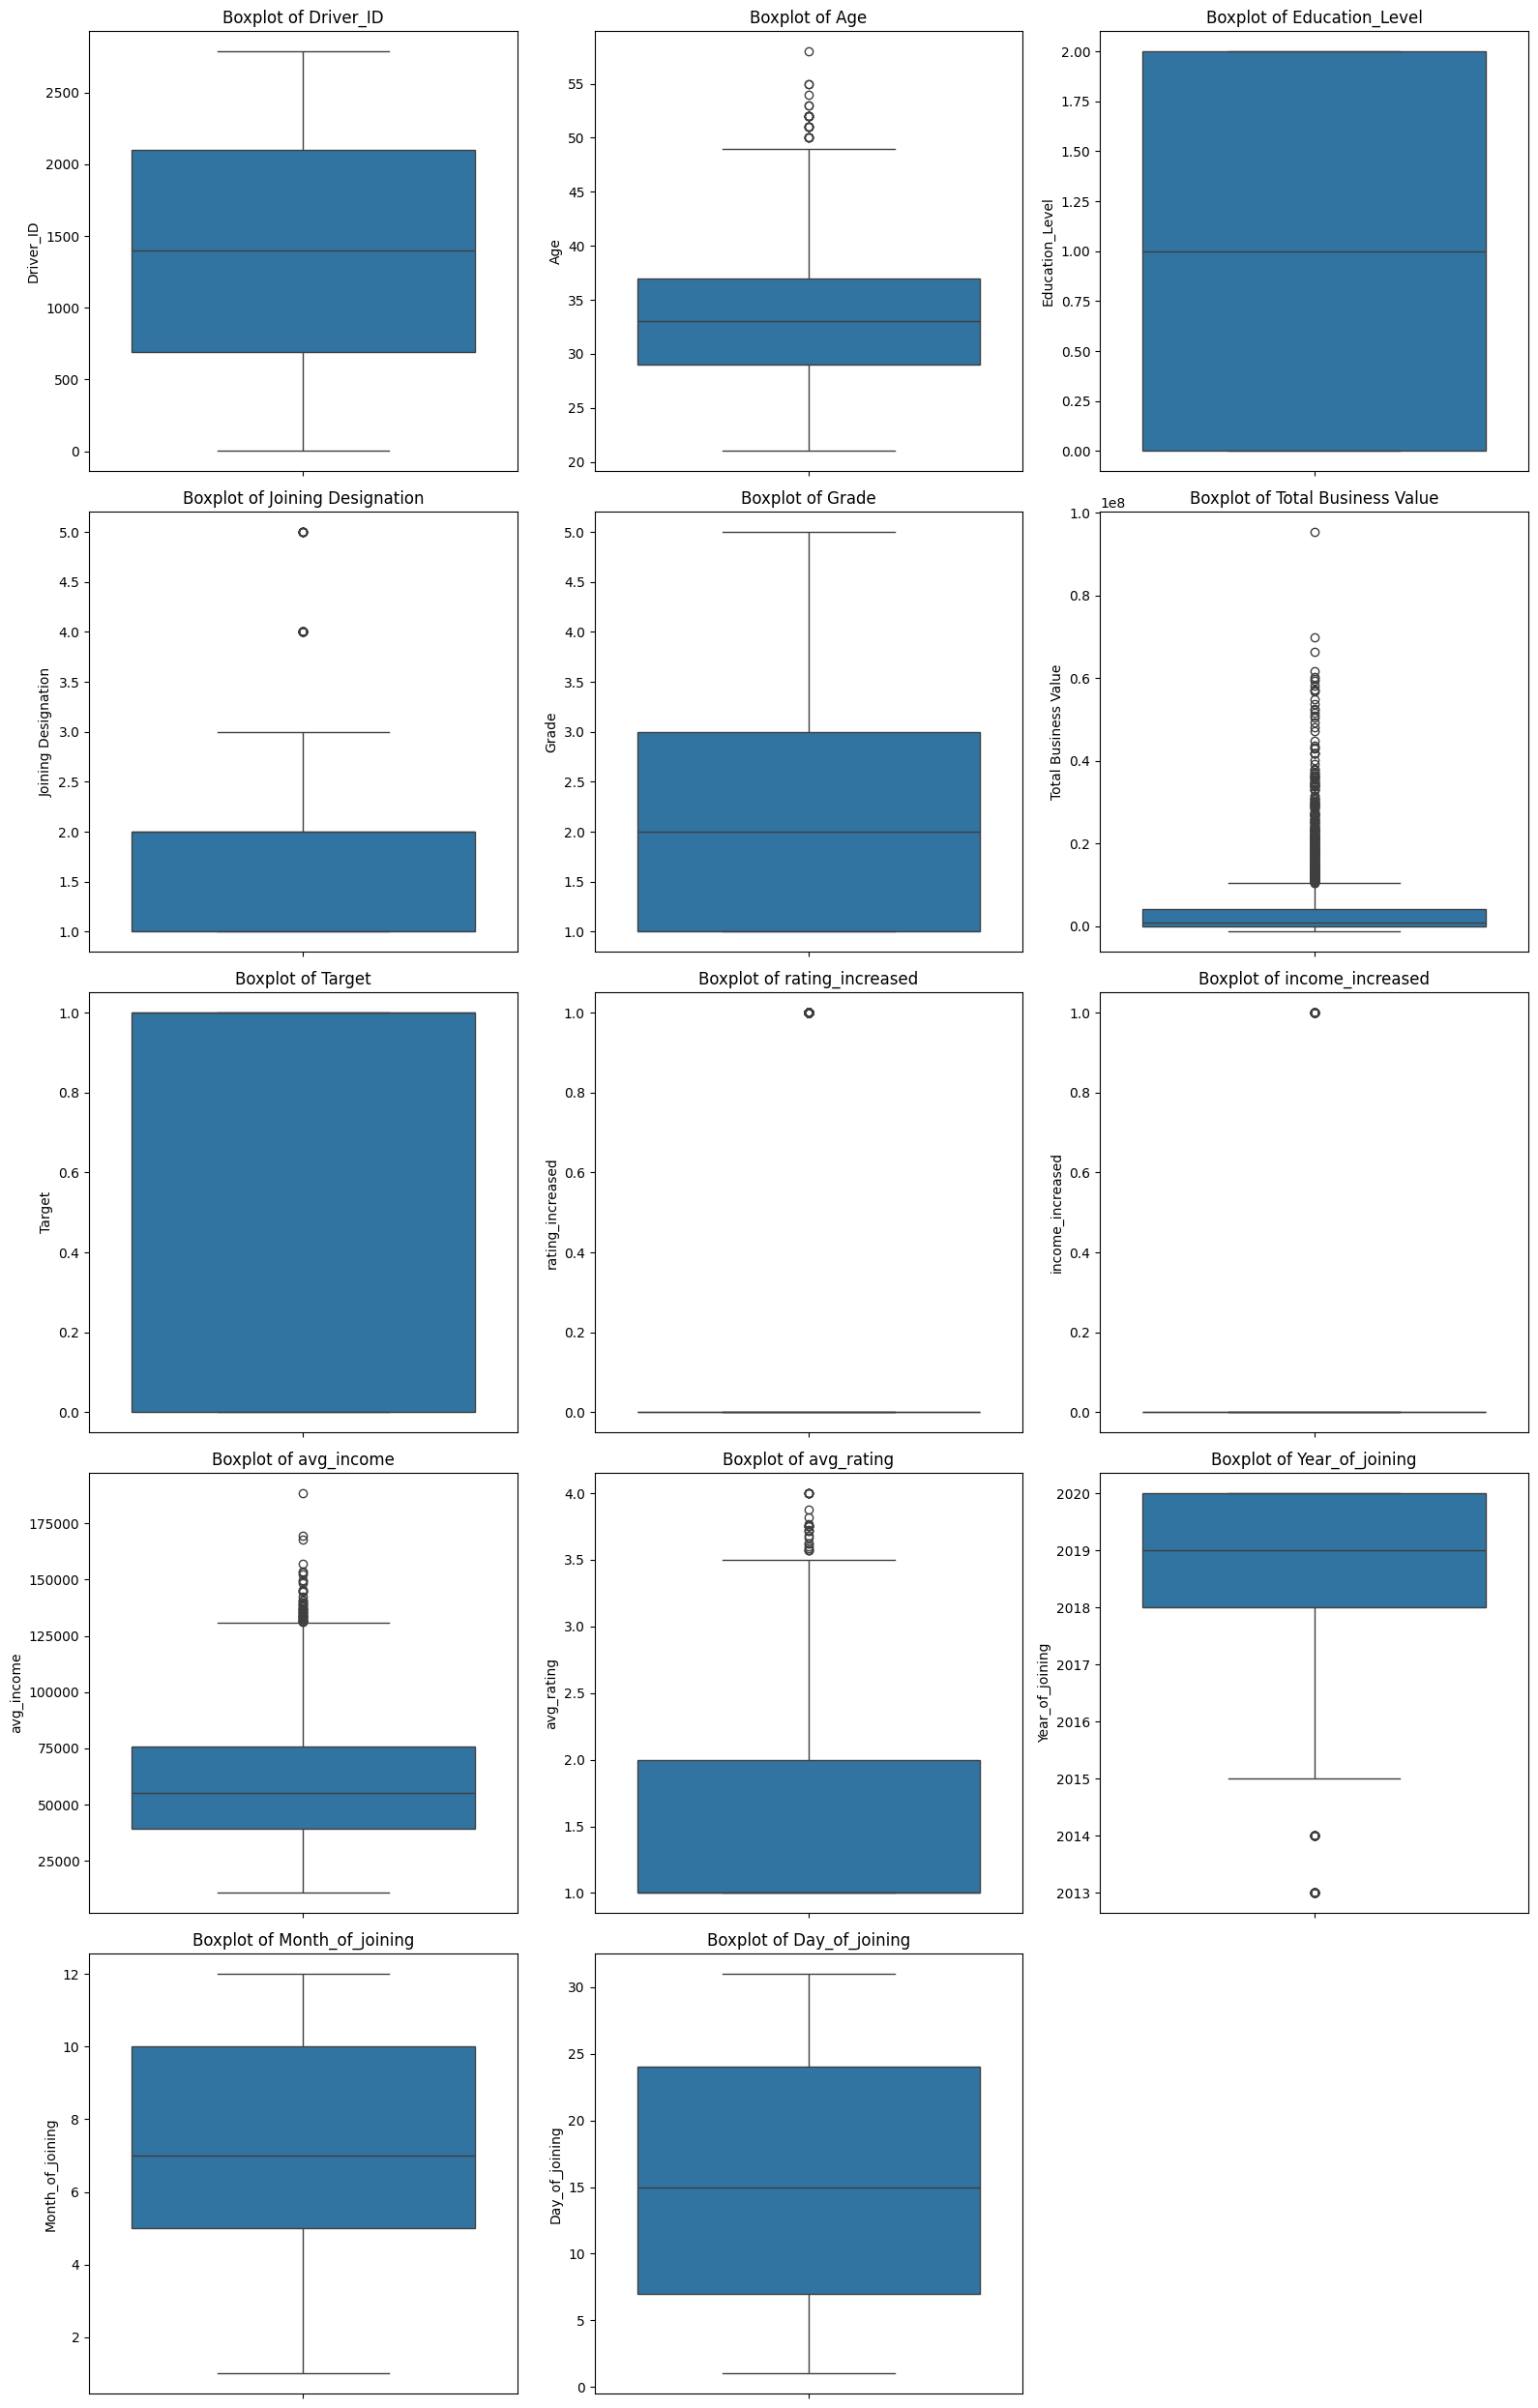

In [ ]:
numeric_cols = agg_df.select_dtypes(include='number').columns

plt.figure(figsize=(16, 5 * ((len(numeric_cols) + 2) // 3)))  # Adjust figure size based on number of plots

for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i)  # 3 plots per row
    sns.boxplot(y=agg_df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

 **Since the outliers are on the columns which are needed to include in the ML algorithm, therefore we need to keep them**

## **Univariate Analysis**

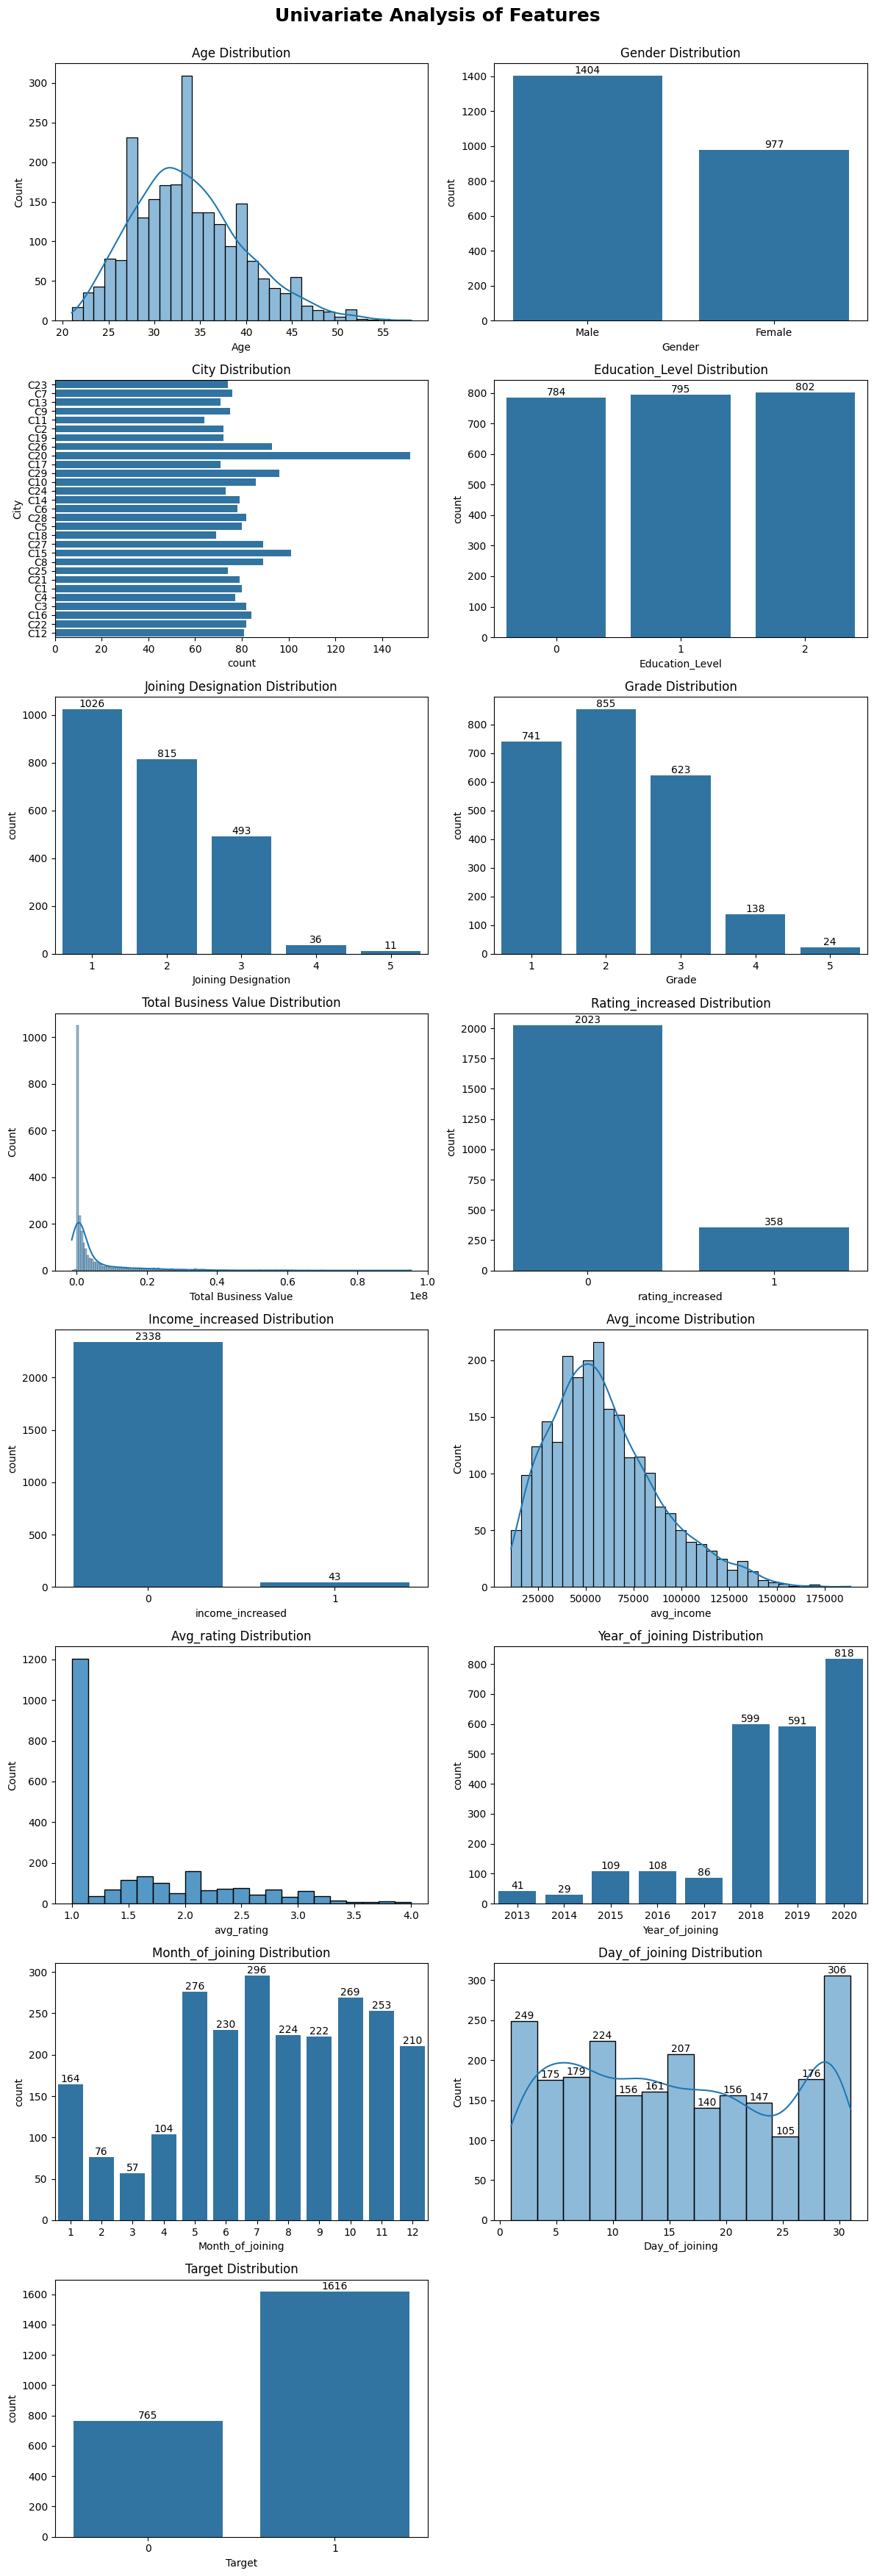

In [ ]:
plt.figure(figsize=(12, 35))

plt.subplot(8, 2, 1)
ax = sns.histplot(x='Age',kde = True, data=agg_df)
plt.title('Age Distribution')

plt.subplot(8, 2, 2)
ax = sns.countplot(x='Gender', data=agg_df)
ax.bar_label(ax.containers[0])
plt.title('Gender Distribution')

plt.subplot(8, 2, 3)
ax = sns.countplot(y='City', data=agg_df)
plt.title('City Distribution')

plt.subplot(8, 2, 4)
ax = sns.countplot(x='Education_Level', data=agg_df)
ax.bar_label(ax.containers[0])
plt.title('Education_Level Distribution')

plt.subplot(8, 2, 5)
ax = sns.countplot(x='Joining Designation', data=agg_df)
ax.bar_label(ax.containers[0])
plt.title('Joining Designation Distribution')

plt.subplot(8, 2, 6)
ax = sns.countplot(x='Grade', data=agg_df)
ax.bar_label(ax.containers[0])
plt.title('Grade Distribution')

plt.subplot(8, 2, 7)
ax = sns.histplot(x='Total Business Value',kde = True, data=agg_df)
plt.title('Total Business Value Distribution')

plt.subplot(8, 2, 8)
ax = sns.countplot(x='rating_increased', data=agg_df)
ax.bar_label(ax.containers[0])
plt.title('Rating_increased Distribution')

plt.subplot(8, 2, 9)
ax = sns.countplot(x='income_increased', data=agg_df)
ax.bar_label(ax.containers[0])
plt.title('Income_increased Distribution')

plt.subplot(8, 2, 10)
ax = sns.histplot(x='avg_income',kde = True, data=agg_df)
plt.title('Avg_income Distribution')

plt.subplot(8, 2, 11)
ax = sns.histplot(x='avg_rating', data=agg_df)
plt.title('Avg_rating Distribution')

plt.subplot(8, 2, 12)
ax = sns.countplot(x='Year_of_joining', data=agg_df)
ax.bar_label(ax.containers[0])
plt.title('Year_of_joining Distribution')

plt.subplot(8, 2, 13)
ax = sns.countplot(x='Month_of_joining', data=agg_df)
ax.bar_label(ax.containers[0])
plt.title('Month_of_joining Distribution')

plt.subplot(8, 2, 14)
ax = sns.histplot(x='Day_of_joining',kde = True, data=agg_df)
ax.bar_label(ax.containers[0])
plt.title('Day_of_joining Distribution')

plt.subplot(8, 2, 15)
ax = sns.countplot(x='Target', data=agg_df)
ax.bar_label(ax.containers[0])
plt.title('Target Distribution')

plt.suptitle('Univariate Analysis of Features', fontsize=18, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

## **Comment on Each Univariate Graph**

**1. Age Distribution:**
   - The distribution is right-skewed with most employees aged between 28 and 35.
   - A normal curve is partially visible, but some outliers exist above age 50.

**2. Gender Distribution:**
   - The workforce is male-dominated with around 1400 males vs 977 females.

**3. City Distribution:**
   - High variance across cities; C23 has the most employees.
   - Imbalanced distribution may impact location-based analysis.

**4. Education Level Distribution:**
   - Balanced distribution across all education levels (0, 1, 2).
   - Slightly more employees have education level 2.

**5. Joining Designation Distribution:**
   - Most employees joined at designation level 1.
   - Very few joined at higher designations like 4 and 5.

**6. Grade Distribution:**
   - Grades are mostly clustered around 1, 2, and 3.
   - Very few employees are in Grade 4 and 5.

**7. Total Business Value Distribution:**
   - Heavily right-skewed.
   - Strong presence of outliers indicating potential for winsorization.

**8. Rating_increased Distribution:**
   - Majority of employees (2023) did not receive a rating increase.
   - Only a small portion (358) had an increase.

**9. Income_increased Distribution:**
   - Almost all employees (2338) did not receive an income increase.
   - Only 43 employees experienced an increase.

**10. Avg_income Distribution:**
  * Right-skewed distribution, peak around ₹50,000–₹60,000.
  * Long tail suggests some high-income outliers.

**11. Avg_rating Distribution:**
  * Skewed left; most ratings lie between 1.0 and 1.5.
  * Indicates many employees received lower average ratings.

**12. Year_of_joining Distribution:**
  * Peak in 2020, followed by 2018 and 2019.
  * Very few joinings before 2016.

**13. Month_of_joining Distribution:**
  * Most joinings occurred from May to November.
  * Very few in February and March.

**14. Day_of_joining Distribution:**
  * Evenly distributed with spikes on certain days (e.g., day 1 and 30).
  * Slight dips in middle days.

**15. Target Distribution:**
  * The target is imbalanced: 1616 attrited (1) vs 765 retained (0).
  * Indicates a class imbalance issue that may need SMOTE or similar technique.


## **Bivariate Analysis**

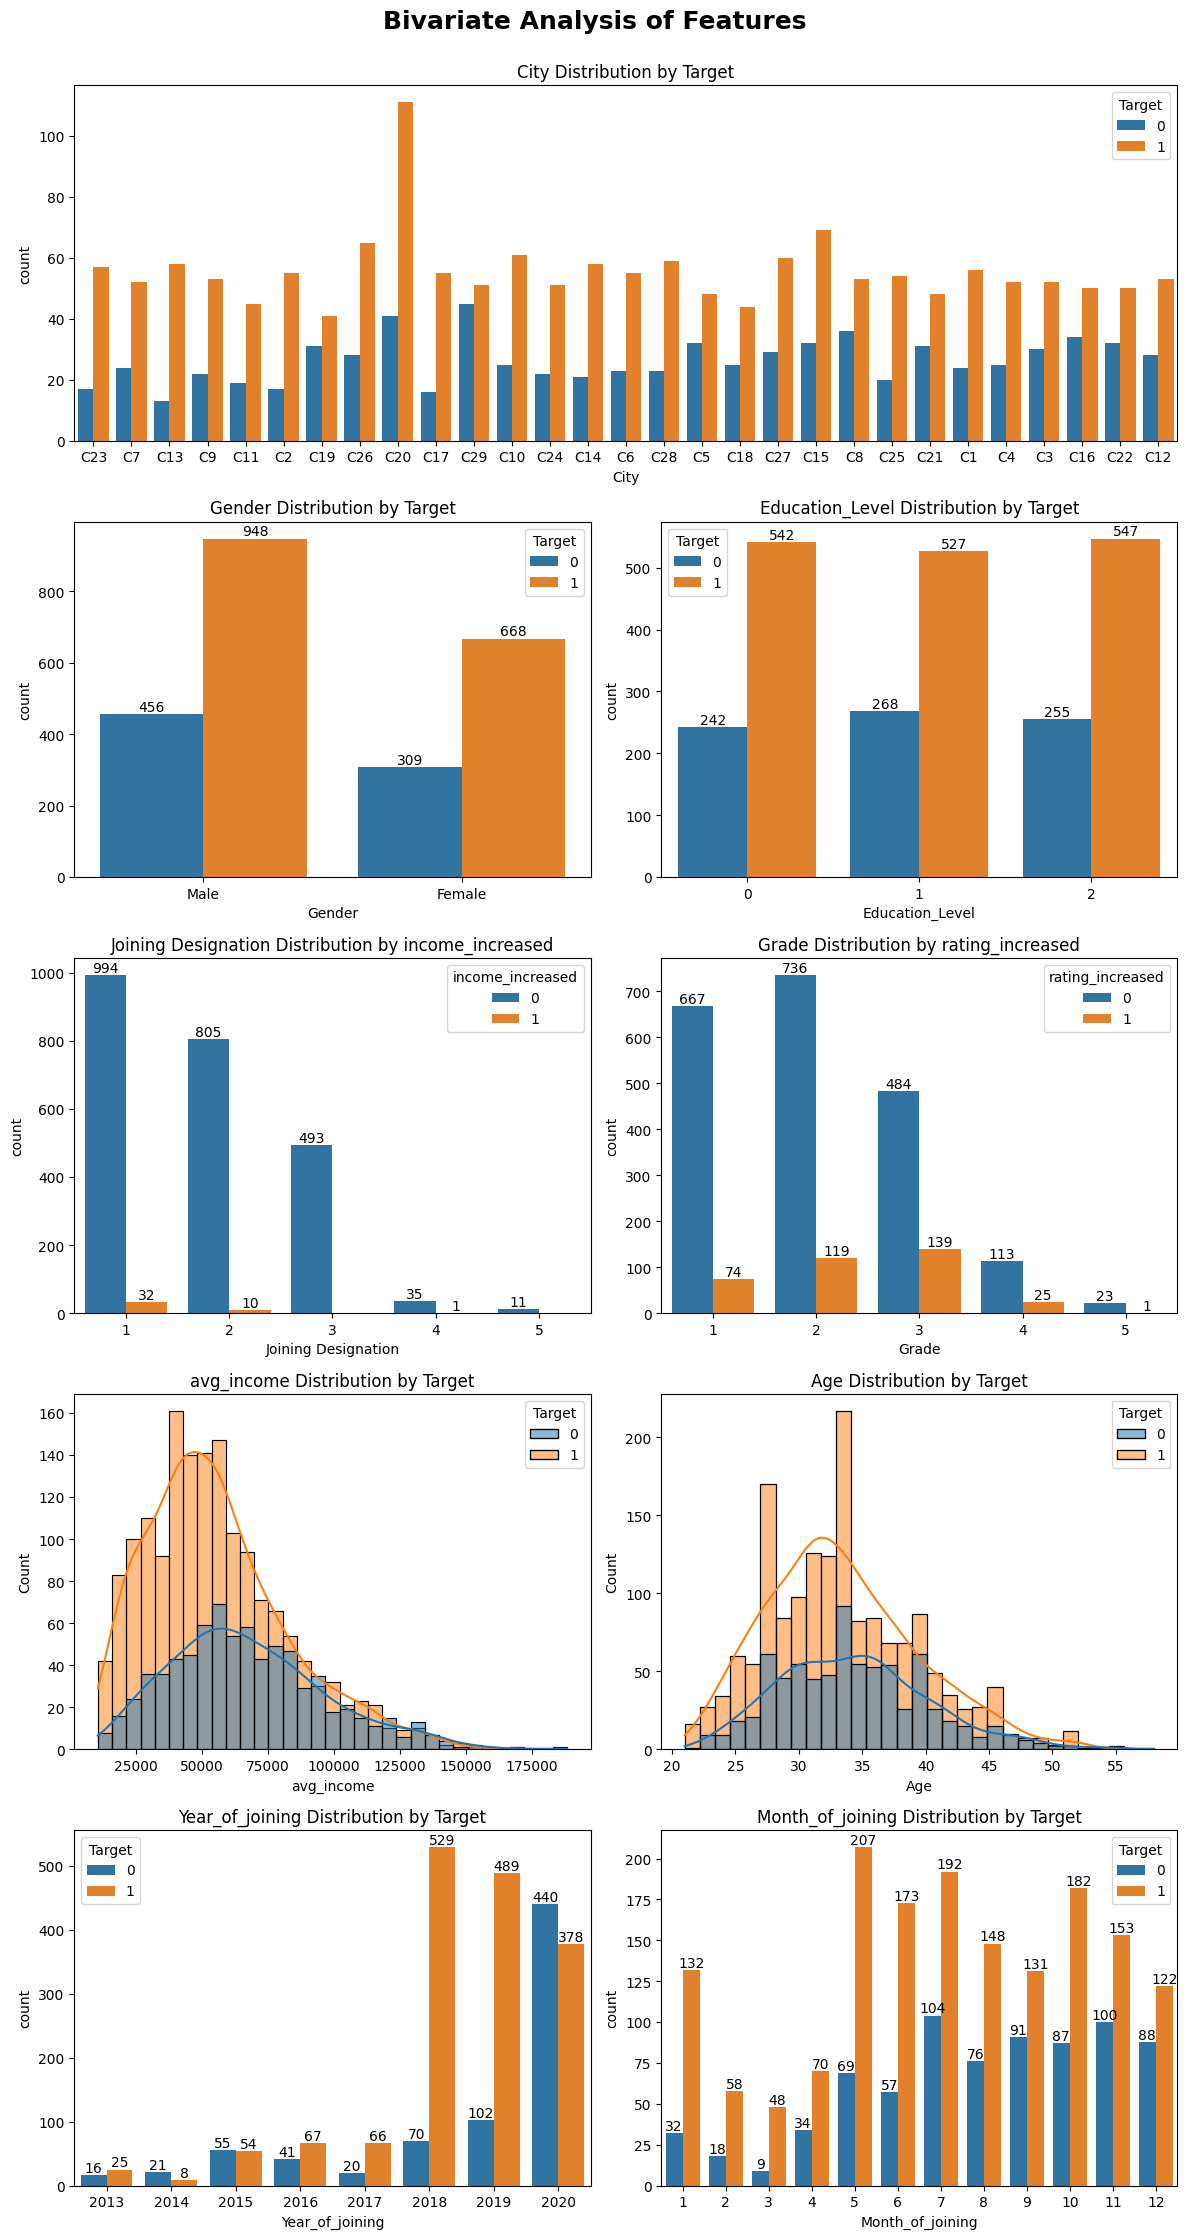

In [ ]:
plt.figure(figsize=(12, 35))

plt.subplot(8, 1, 1)
ax = sns.countplot(x='City',hue='Target', data=agg_df)
plt.title('City Distribution by Target')

plt.subplot(8, 2, 3)
ax = sns.countplot(x='Gender',hue='Target', data=agg_df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Gender Distribution by Target')

plt.subplot(8, 2, 4)
ax = sns.countplot(x='Education_Level',hue='Target', data=agg_df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Education_Level Distribution by Target')

plt.subplot(8, 2, 5)
ax = sns.countplot(x='Joining Designation',hue='income_increased', data=agg_df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Joining Designation Distribution by income_increased')

plt.subplot(8, 2, 6)
ax = sns.countplot(x='Grade',hue='rating_increased', data=agg_df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Grade Distribution by rating_increased')

plt.subplot(8, 2, 7)
ax = sns.histplot(x='avg_income',hue='Target', kde= True, data=agg_df)
plt.title('avg_income Distribution by Target')

plt.subplot(8, 2, 8)
ax = sns.histplot(x='Age',hue='Target', kde= True, data=agg_df)
plt.title('Age Distribution by Target')

plt.subplot(8, 2, 9)
ax = sns.countplot(x='Year_of_joining',hue='Target', data=agg_df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Year_of_joining Distribution by Target')

plt.subplot(8, 2, 10)
ax = sns.countplot(x='Month_of_joining',hue='Target', data=agg_df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Month_of_joining Distribution by Target')

plt.suptitle('Bivariate Analysis of Features', fontsize=18, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

## **Comment on Each Bivariate Graph**

**1. City Distribution by Target:**
   - Attrition (Target = 1) is higher across all cities.
   - Some cities (e.g., C17, C26) have especially high attrition compared to retention.

**2. Gender Distribution by Target:**
   - Both males and females show higher attrition.
   - Female attrition (668) is slightly higher than male attrition (948 vs 456 retained).

**3. Education Level Distribution by Target:**
   - For all education levels, attrition is higher than retention.
   - Particularly notable in level 1 and 2.

**4. Joining Designation by Income Increased:**
   - Income increases are rare across all designations.
   - Only those with designation 1 and 2 saw income hikes, and even then, very few.

**5. Grade Distribution by Rating Increased:**
   - Rating increases mostly occurred in Grade 2 and 3.
   - Grade 1 and Grade 4 saw very limited rating hikes.
   - No rating increase observed in Grade 5.

**6. Avg_income Distribution by Target:**
   - Employees with lower avg_income tend to attrite more.
   - Higher avg_income appears to be associated with retention.

**7. Age Distribution by Target:**
   - Employees aged 30–35 show higher attrition.
   - Younger employees (<30) and older ones (>40) show lower attrition.

**8. Year_of_joining Distribution by Target:**
   - Maximum attrition happened among employees who joined in 2018–2020.
   - Suggests newer joiners are more likely to leave.

**9. Month_of_joining Distribution by Target:**
   - Employees who joined in mid-year (April to October) show more attrition.
   - Least attrition observed in Jan–March joiners.

## **Removing Highly Correlated Features**

In [ ]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Driver_ID             2381 non-null   int64  
 1   Age                   2381 non-null   float64
 2   Gender                2381 non-null   object 
 3   City                  2381 non-null   object 
 4   Education_Level       2381 non-null   int64  
 5   Joining Designation   2381 non-null   int64  
 6   Grade                 2381 non-null   int64  
 7   Total Business Value  2381 non-null   int64  
 8   Target                2381 non-null   int64  
 9   rating_increased      2381 non-null   int64  
 10  income_increased      2381 non-null   int64  
 11  avg_income            2381 non-null   float64
 12  avg_rating            2381 non-null   float64
 13  Year_of_joining       2381 non-null   int32  
 14  Month_of_joining      2381 non-null   int32  
 15  Day_of_joining       

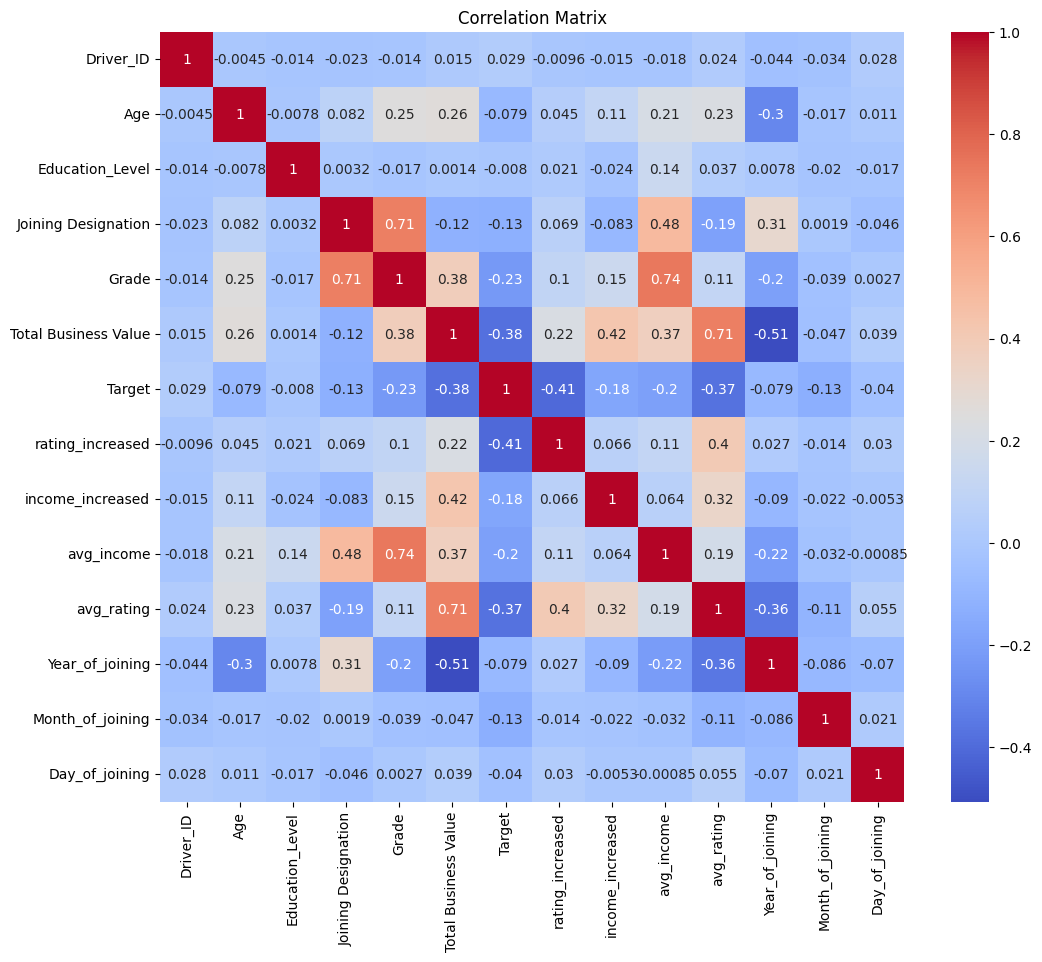

In [ ]:
num_cols = agg_df.select_dtypes(include='number')

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
agg_df.drop(['Grade','Driver_ID'],axis=1,inplace=True)
agg_df.head()

,Age,Gender,City,Education_Level,Joining Designation,Total Business Value,Target,rating_increased,income_increased,avg_income,avg_rating,Year_of_joining,Month_of_joining,Day_of_joining
0,28.0,Male,C23,2,1,1715580,1,0,0,57387.0,2.0,2018,12,24
1,31.0,Male,C7,2,2,0,0,0,0,67016.0,1.0,2020,11,6
2,43.0,Male,C13,2,2,350000,1,0,0,65603.0,1.0,2019,12,7
3,29.0,Male,C9,0,1,120360,1,0,0,46368.0,1.0,2019,1,9
4,31.0,Female,C11,1,3,1265000,0,1,0,78728.0,1.6,2020,7,31


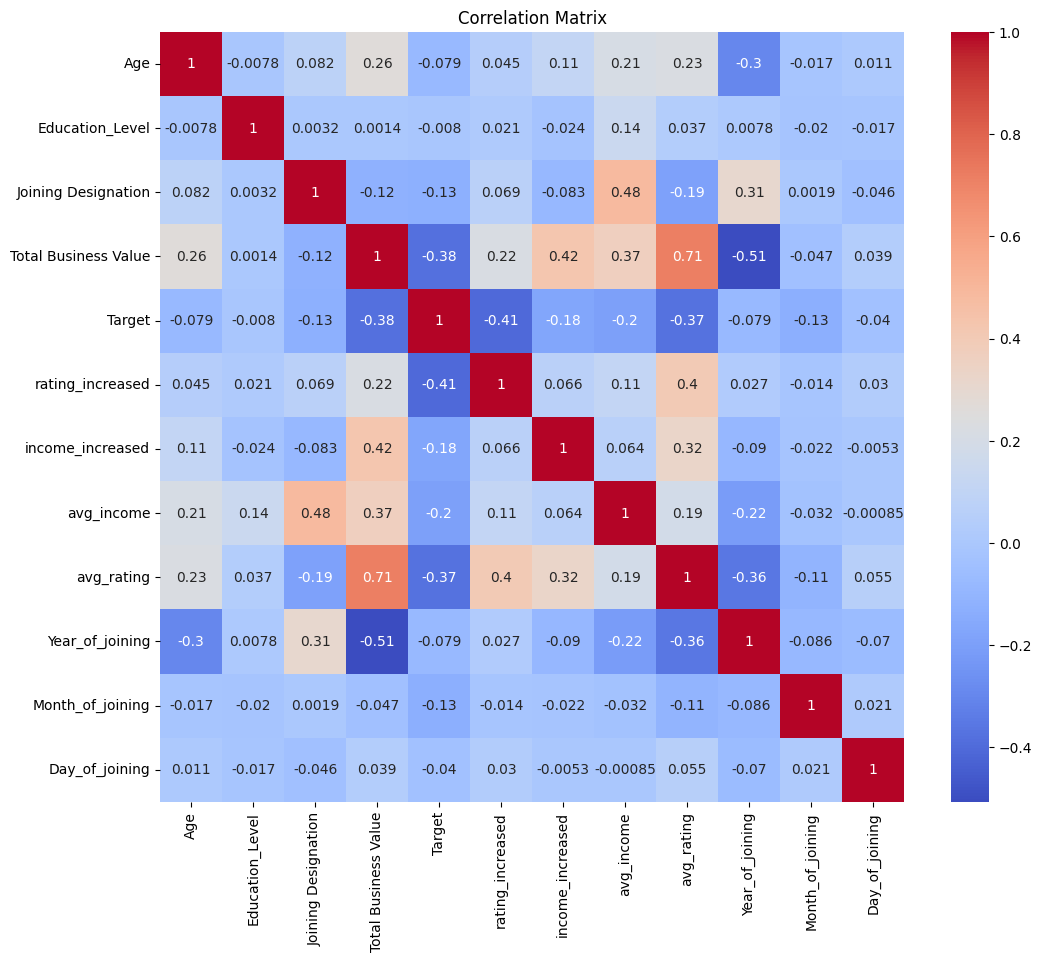

In [ ]:
num_cols = agg_df.select_dtypes(include='number')

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

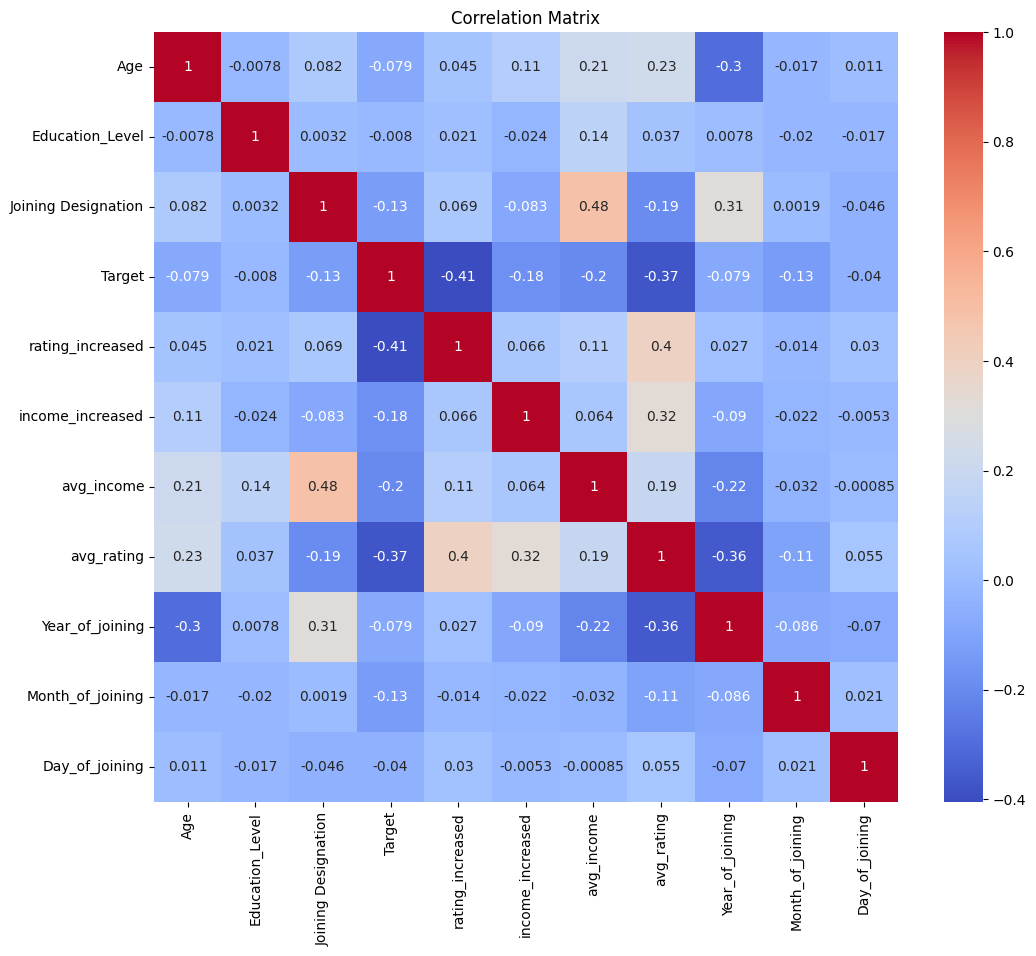

In [ ]:
agg_df.drop(['Total Business Value'],axis=1,inplace=True)

num_cols = agg_df.select_dtypes(include='number')
plt.figure(figsize=(12, 10))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## **Encoding**

In [ ]:
agg_df = pd.get_dummies(agg_df, columns=['Gender','City'], prefix=['Gender','City'])
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2381 non-null   float64
 1   Education_Level      2381 non-null   int64  
 2   Joining Designation  2381 non-null   int64  
 3   Target               2381 non-null   int64  
 4   rating_increased     2381 non-null   int64  
 5   income_increased     2381 non-null   int64  
 6   avg_income           2381 non-null   float64
 7   avg_rating           2381 non-null   float64
 8   Year_of_joining      2381 non-null   int32  
 9   Month_of_joining     2381 non-null   int32  
 10  Day_of_joining       2381 non-null   int32  
 11  Gender_Female        2381 non-null   bool   
 12  Gender_Male          2381 non-null   bool   
 13  City_C1              2381 non-null   bool   
 14  City_C10             2381 non-null   bool   
 15  City_C11             2381 non-null   b

## **Train-test Split**

In [ ]:
X = agg_df.drop(columns = 'Target')
y = agg_df['Target']
X.shape, y.shape

((2381, 41), (2381,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1904, 41), (477, 41), (1904,), (477,))

## **Standardization**

In [ ]:
X_train_columns = X_train.columns
X_train_columns

Index(['Age', 'Education_Level', 'Joining Designation', 'rating_increased',
       'income_increased', 'avg_income', 'avg_rating', 'Year_of_joining',
       'Month_of_joining', 'Day_of_joining', 'Gender_Female', 'Gender_Male',
       'City_C1', 'City_C10', 'City_C11', 'City_C12', 'City_C13', 'City_C14',
       'City_C15', 'City_C16', 'City_C17', 'City_C18', 'City_C19', 'City_C2',
       'City_C20', 'City_C21', 'City_C22', 'City_C23', 'City_C24', 'City_C25',
       'City_C26', 'City_C27', 'City_C28', 'City_C29', 'City_C3', 'City_C4',
       'City_C5', 'City_C6', 'City_C7', 'City_C8', 'City_C9'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X_train_columns)
X_test = pd.DataFrame(X_test, columns=X_train_columns)
X_train.head()

,Age,Education_Level,Joining Designation,rating_increased,income_increased,avg_income,avg_rating,Year_of_joining,Month_of_joining,Day_of_joining,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,-0.964094,-1.241468,1.386445,-0.426468,-0.136845,1.003180,-0.787383,0.910871,1.149725,0.773468,...,-0.193913,-0.183464,-0.209427,-0.188003,-0.181929,-0.189496,-0.181929,-0.175673,-0.198246,-0.180383
1,0.034710,-1.241468,0.202151,-0.426468,-0.136845,-0.734300,-0.787383,0.292583,1.149725,-0.079396,...,-0.193913,-0.183464,-0.209427,-0.188003,-0.181929,-0.189496,-0.181929,-0.175673,-0.198246,-0.180383
2,-1.130562,-1.241468,-0.982143,-0.426468,-0.136845,-0.223283,-0.787383,-0.943994,-1.735701,-0.612436,...,-0.193913,-0.183464,-0.209427,-0.188003,-0.181929,-0.189496,-0.181929,-0.175673,-0.198246,5.543765
3,-0.631160,1.214381,-0.982143,2.344844,-0.136845,-0.888988,0.379462,0.292583,1.149725,0.560252,...,-0.193913,-0.183464,-0.209427,-0.188003,-0.181929,-0.189496,-0.181929,-0.175673,-0.198246,-0.180383
4,2.198786,-1.241468,-0.982143,-0.426468,-0.136845,1.095323,1.424762,-2.180571,-0.132687,0.773468,...,-0.193913,-0.183464,-0.209427,-0.188003,-0.181929,-0.189496,-0.181929,-0.175673,-0.198246,-0.180383


## **Class Imbalance Treatment using SMOTE**

In [ ]:
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
y_train_resampled.value_counts()

,count
Target,
0,1289
1,1289


## **Bagging**

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.8574423480083857

### **Hyperparameter Tuning using RandomizedSearchCV**

In [ ]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': [10, 20, 30, X_train_resampled.shape[1]],
    'max_samples': [600, 1800, 2400, X_train_resampled.shape[0]],
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=params, scoring = "accuracy", n_iter=30, cv=2, verbose=1, random_state=42)
random_search.fit(X_train_resampled, y_train_resampled)
best_params = random_search.best_params_
best_score = random_search.best_score_
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score achieved: ", random_search.best_score_)

Fitting 2 folds for each of 30 candidates, totalling 60 fits
Best parameters found:  {'n_estimators': 200, 'max_samples': 600, 'max_features': 20, 'max_depth': 30}
Best cross-validation score achieved:  0.8719937936384794


In [ ]:
best_rf_model = random_search.best_estimator_
best_rf_model

RandomForestClassifier(max_depth=30, max_features=20, max_samples=600,
                       n_estimators=200, random_state=42)

In [ ]:
rf = best_rf_model
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.8637316561844863

In [ ]:
feature_importances = best_rf_model.feature_importances_

feature_names = X_train_resampled.columns

sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

most_important_feature_name = sorted_feature_names[0]
print(f"The most important feature is: {most_important_feature_name} with an importance score of: {sorted_importances[0]:.4f}")

The most important feature is: Year_of_joining with an importance score of: 0.2196


In [ ]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       150
           1       0.91      0.88      0.90       327

    accuracy                           0.86       477
   macro avg       0.84      0.85      0.84       477
weighted avg       0.87      0.86      0.86       477

ROC AUC: 0.9173496432212028


## **Boosting**

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train_resampled, y_train_resampled)
y_pred_gb = gb.predict(X_test)

In [ ]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_gb

0.8553459119496856

In [ ]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       150
           1       0.90      0.89      0.89       327

    accuracy                           0.86       477
   macro avg       0.83      0.83      0.83       477
weighted avg       0.86      0.86      0.86       477



### **Hyperparameter Tuning using RandomizedSearchCV**

In [ ]:
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [10, 20, 30, X_train_resampled.shape[1]],
    'max_leaf_nodes': [None, 10, 20, 30]
}


gb = GradientBoostingClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=gb, param_distributions=params, scoring = "accuracy", n_iter=30, cv=2, verbose=1, random_state=42)
random_search.fit(X_train_resampled, y_train_resampled)
best_params = random_search.best_params_
best_score = random_search.best_score_
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score achieved: ", random_search.best_score_)

Fitting 2 folds for each of 30 candidates, totalling 60 fits
Best parameters found:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': 20, 'max_features': 41, 'max_depth': 20, 'learning_rate': 0.01}
Best cross-validation score achieved:  0.8626842513576416


In [ ]:
best_gb_model = random_search.best_estimator_
best_gb_model

GradientBoostingClassifier(learning_rate=0.01, max_depth=20, max_features=41,
                           max_leaf_nodes=20, min_samples_leaf=2,
                           n_estimators=200, random_state=42)

In [ ]:
gb = best_gb_model
gb.fit(X_train_resampled, y_train_resampled)
y_pred_gb = gb.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_gb)
accuracy_rf

0.8658280922431866

In [ ]:
feature_importances = best_gb_model.feature_importances_

feature_names = X_train_resampled.columns

sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

most_important_feature_name = sorted_feature_names[0]
print(f"The most important feature is: {most_important_feature_name} with an importance score of: {sorted_importances[0]:.4f}")

The most important feature is: avg_rating with an importance score of: 0.2965


In [ ]:
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("ROC AUC:", roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1]))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       150
           1       0.91      0.89      0.90       327

    accuracy                           0.87       477
   macro avg       0.84      0.85      0.85       477
weighted avg       0.87      0.87      0.87       477

ROC AUC: 0.9119367991845058


## **ROC AUC Curve**

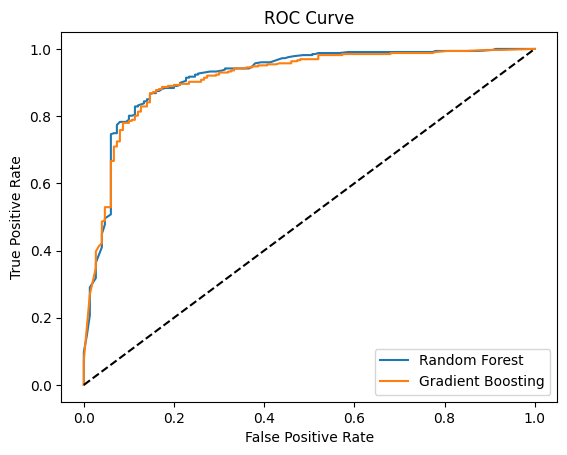

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb.predict_proba(X_test)[:, 1])

plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 📈 **ROC AUC Curve Analysis**

**Insight:**
- The ROC curve compares two models: **Random Forest** and **Gradient Boosting**.
- Both models show **excellent performance**, as their curves are well above the diagonal (baseline) and hug the top-left corner.
- This indicates a **high True Positive Rate (Sensitivity)** at a **low False Positive Rate**, which is ideal for a classification problem.

**Key Observations:**
- **Random Forest** has a slightly better ROC curve than **Gradient Boosting**, especially in the early stages (FPR < 0.2), suggesting it may have **better discriminatory power**.
- The **AUC (Area Under Curve)** for both models appears to be very high (likely > 0.90), meaning both are strong classifiers.

**Conclusion:**
- Both models are highly capable of distinguishing between classes.
- **Random Forest might be slightly preferred** if the goal is to minimize false positives early on.

## **Questionnaire**

### **1. What percentage of drivers have received a quarterly rating of 5?**

In [ ]:
df[df['Quarterly Rating']==5]['Driver_ID'].nunique()/df['Driver_ID'].nunique()*100

0.0

**There are no drivers who got the Quarterly rating of 5**

### **2. Comment on the correlation between Age and Quarterly Rating.**

In [ ]:
correlation = df['Age'].corr(df['Quarterly Rating'])

print(f'Correlation between Age and Quarterly Rating: {correlation}')

Correlation between Age and Quarterly Rating: 0.17181837533931058


**0.17 is a weak correlation between Age and Quarterly Rating**

### **3. Name the city which showed the most improvement in Quarterly Rating over the past year.**

In [ ]:
city1_df = df.groupby('City').agg({
    'Quarterly Rating': 'first',
}).reset_index()
city1_df.sort_values(by='City',ascending=True,inplace=True)

city2_df = df.groupby('City').agg({
    'Quarterly Rating': 'last'
}).reset_index()
city2_df.sort_values(by='City',ascending=True,inplace=True)
city_df = city1_df.merge(city2_df, on='City', suffixes=('_first', '_last'))
city_df['Diff'] = city_df['Quarterly Rating_last']-city_df['Quarterly Rating_first']
city_df[city_df['Diff']>0].sort_values(by='Diff',ascending=False).head(1)

,City,Quarterly Rating_first,Quarterly Rating_last,Diff
14,C22,1,4,3


**City 22 has the most improvement in Quarterly Rating over the past year.**

### **4. Drivers with a Grade of ‘A’ are more likely to have a higher Total Business Value.(T/F)**

**True. The analysis shows that higher grades (especially Grades 2 and 3) are associated with rating improvements, and better ratings correlate with higher total business value.**

### **5. If a driver's Quarterly Rating drops significantly, how does it impact their Total Business Value in the subsequent period?**

**Lower average ratings are associated with lower business value. Therefore, a drop in ratings likely leads to lower total business performance.**

### **6. From Ola's perspective, which metric should be the primary focus for driver retention?**

**Recall is most critical.**

**Reason: The goal is to minimize false negatives (i.e., not predicting that a driver will leave when they actually do). This helps in proactively retaining drivers.**

### **7. How does the gap in precision and recall affect Ola's relationship with its drivers and customers?**

* **High recall with low precision: Ola will try to retain many drivers, some of whom wouldn't have left. This may increase retention costs.**

* **Low recall with high precision: Ola will miss many who leave, leading to poor driver supply and customer dissatisfaction.**

**An imbalance affects both retention cost and customer service quality**

### **8. Besides the obvious features like "Number of Rides", which lesser-discussed features might have a strong impact on a driver's Quarterly Rating?**

* **Grade**
* **Year_of_joining**
* **Joining** Designation
* **Education_Level**

**These features show significant associations with rating improvements and performance.**

### **9. Will the driver's performance be affected by the City they operate in? (Yes/No)**

**Yes.**

**City distribution and rating_increased analysis suggest performance and attrition vary across cities like C17, C26 (with higher attrition and lower ratings).**

### **10. Analyze any seasonality in the driver's ratings. Do certain times of the year correspond to higher or lower ratings, and why might that be**

* **Most joinings occur from May to November.**
* **Attrition and lower ratings are also higher in these months.**

**This may be due to:**
   * **Festive season demands**
   * **Monsoon-related delays or cancellations**
   * **End-of-quarter evaluations**

**Thus, ratings may dip mid-year and improve post-monsoon or year-end.**

#  **Insights & Recommendations**

### **1. Attrition Risk is Highest Among New Joiners**
- **Insight:** Most attrition is observed in drivers who joined between 2018 and 2020.
- **Recommendation:** Implement a structured onboarding program and early engagement initiatives during the first 6–12 months of joining.

### **2. Driver Ratings Are Generally Low**
- **Insight:** Majority of drivers have average quarterly ratings between 1.0 and 1.5; no one received a perfect rating of 5.
- **Recommendation:** Regular performance feedback and coaching should be introduced to help drivers improve their service quality.

### **3. Rating Drop Impacts Business Value**
- **Insight:** Lower quarterly ratings are associated with lower Total Business Value.
- **Recommendation:** Set up a monitoring system that flags drivers with declining ratings and provides personalized support or re-training.

### **4. City-Level Disparities Affect Retention**
- **Insight:** Cities like C17 and C26 show significantly higher attrition rates.
- **Recommendation:** Investigate local issues (infrastructure, demand, incentives) in high-risk cities and tailor city-specific retention policies.

### **5. Grade and Designation Influence Performance**
- **Insight:** Higher grades and joining designations are linked to increased business value and rating improvements.
- **Recommendation:** Promote deserving drivers and assign better incentives for maintaining high grades and consistent performance.

### **6. Seasonal Trends Affect Driver Ratings**
- **Insight:** Attrition and lower ratings are higher from May to November, possibly due to festive demand, weather, or stress.
- **Recommendation:** Offer seasonal bonuses and mental wellness support during peak stress months.

### **7. Income Growth is Rare**
- **Insight:** Only 43 drivers showed an income increase out of 2,381.
- **Recommendation:** Consider implementing a performance-linked variable pay system to motivate and retain drivers.

### **8. Gender-Based Observations**
- **Insight:** While the workforce is male-dominated, female drivers show slightly higher attrition.
- **Recommendation:** Provide better safety assurance, flexible work hours, and support for female drivers to improve retention.

### **9. Focus on High Recall for Retention Model**
- **Insight:** Recall was highlighted as the most important metric to catch all drivers at risk of leaving.
- **Recommendation:** Choose models with high recall even at the cost of some precision, ensuring fewer drivers slip through unnoticed.

### **10. Feature Importance for Prediction**
- **Insight:** `avg_rating`, `Year_of_joining`, and `rating_increased` were top features in model importance.
- **Recommendation:** Focus data collection and reporting efforts on these key features to enhance prediction accuracy and intervention strategies.
